<h1 style="font-weight: bold;">SIMPLE LINEAR REGRESSION with SCIKIT-LEARN</h1>

<p style="font-size: 20px; font-weight: 400;"><i>The Dataset in CSV format</i> is converted to <i>a Pandas Dataframe</i>.</p>


In [1]:
import pandas as pd

df = pd.read_csv("simple_linear_regression_data.csv")
df.head()

,X,Y
0,0.274,15.183
1,7.211,54.433
2,7.413,44.167
3,7.688,111.329
4,8.996,116.419


<p style="font-size: 20px; font-weight: 400;"><i>The Dataframe</i> is divided into <i>Features (X)</i> and <i>Labels (Y)</i> datasets.</p>

In [2]:
x, y = df.iloc[:,:1], df.iloc[:,1]

<p style="font-size: 20px; font-weight: 400;"><i>The Features (X)</i> and <i>Labels (Y)</i> are splitted into their corresponding <i>Train</i> and <i>Test</i> sets, with <i>the Test size</i> being <i>one-fifth</i> of the whole dataset.</p>

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

<h2 style="font-weight: bold;">Simple Linear Regression</h2>
<p style="font-size: 20px; font-weight: 400;"><i>Simple Linear Regression</i> refers to the linear relationship between <i>one independent variable (X)</i> and <i>one dependent variable (Y).</i></p>
<p style="font-size: 20px; font-weight: 400;"><i>Formula: </i></p>
<div style="text-align: left;">
    <p style="text-align: center; font-size: 20px; font-weight: 400;"">y = &beta;<sub>0</sub> + &beta;<sub>1</sub> x + &epsilon;</p>
     <p style="text-align: right; font-size: 16px;"><strong>&beta;<sub>0</sub>:</strong> Intercept Value&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
    <p style="text-align: right; font-size: 16px;"><strong>&beta;<sub>1</sub>:</strong> Slope Value&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
    <p style="text-align: right; font-size: 16px;"><strong>&epsilon;:</strong> Error Value &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>

</div>

<p style="font-size: 20px; font-weight: 400;"><i>The Linear Regression Model Object</i> is defined by utilizing <i>Scikit-Learn</i> library. It is fitted using the <i>training features</i> and <i>labels</i>, and <i>the Linear Regression Formula</i> is derived.</p>

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

equation = f"y = { round(lr.coef_[0], 3) } x + { round(lr.intercept_, 3) }"
print(f"The Simple Linear Regression Formula : { equation }")

The Simple Linear Regression Formula : y = 3.178 x + 56.663


<p style="font-size: 20px; font-weight: 400;">Then the model is used to predict the test labels using the test features dataset.</p>

In [5]:
preds = lr.predict(x_test)
preds

array([207.94509536, 608.75941911,  80.21899441, 423.9688743 ,
       538.92077633, 636.03328711, 154.24897261, 525.45066955,
       422.99968757, 644.08865882, 401.69029006, 635.10540998,
       548.6761969 , 130.72474509,  98.39839542, 224.59921889,
       191.37994636, 199.18746048, 245.20317556, 109.82208824])

<script type="text/x-mathjax-config">
  MathJax.Hub.Config({
    tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}
  });
</script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_HTML"></script>
<h2 style="font-weight: bold;">Mean Squared Error</h2>
<p style="font-size: 20px; font-weight: 400;"><i>Mean Squared Error</i> is the average squared difference between <i>observed</i> and <i>predicted values.</i></p>
<p style="font-size: 20px; font-weight: 400;"><i>Formula: </i></p>
<div style="text-align: left;">
    <p style="font-size: 20px; font-weight: 400;">$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \ p_i)^2$$</p>
    <p style="text-align: right; font-size: 16px;"><strong>n:</strong> Number of Instances (Rows)&nbsp;&nbsp;&nbsp;&nbsp;</p>
    <p style="text-align: right; font-size: 16px;"><strong>y<sub>i</sub>:</strong> \(i\)th Actual Y Value&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>
    <p style="text-align: right; font-size: 16px;"><strong>p<sub>i</sub>:</strong> \(i\)th Prediction Value&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>

</div>

<p style="font-size: 20px; font-weight: 400;"><i>The Mean Squared Error</i> is calculated by using <i>Predictions</i> and <i>Actual Y Values.</i></p>

In [6]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, preds)
print("The Mean Squared Error:", round(mse, 3))

The Mean Squared Error: 1098.394


<p style="font-size: 20px; font-weight: 400;">The chart below demonstrates <i>the Actual Y Values</i> in the Test set, <i>the Prediction Line</i> created by Linear Regression for the Test set, <i>The Equation of The Prediction Line</i>, and <i>the Error Lines</i> depicting the difference between the Actual Test Values and the Predicted Test Values.</p>

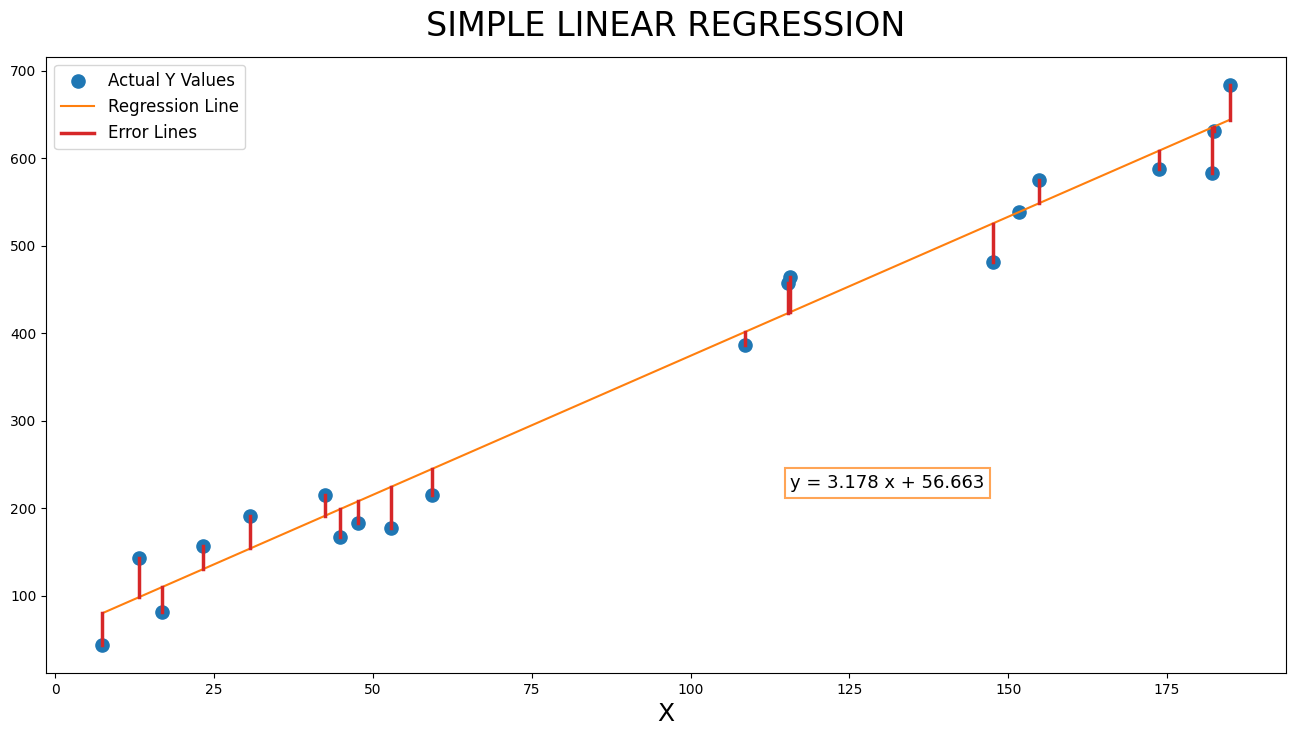

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[16,8])

#Actual Y Values (BLUE)
plt.scatter(x_test.values.reshape(-1),
            y_test,
            color=sns.color_palette()[0],
            s=90,
            label="Actual Y Values")

#Linear Regression Line (ORANGE)
sns.lineplot(x=x_test.values.reshape(-1),
             y=preds.reshape(-1),
             color=sns.color_palette()[1],
             label="Regression Line")

#Linear Regression Equation
plt.text(x=0.6,
         y=0.3, 
         s=equation, 
         fontsize=13, 
         transform=plt.gca().transAxes, 
         bbox=dict(edgecolor=sns.color_palette()[1],
                   linewidth=1.5, 
                   facecolor='white', 
                   alpha=0.7))

#Error Lines (RED)
for i in range(y_test.shape[0]):
    plt.plot([x_test.values.reshape(-1)[i]]*2,
             [y_test.values[i], preds.reshape(-1)[i]],
             color=sns.color_palette()[3],
             linewidth=2.5,
             label="Error Lines" if i == 0 else "_nolegend_")


plt.title("SIMPLE LINEAR REGRESSION", fontsize=24, pad=15)
plt.xlabel("X", fontsize=18)
plt.legend(fontsize='12')
plt.show()